# Dog Breed Classification
## Grp 7 : Maalal Ilyas - Aya El Janati



# Installing and Importing Libraries

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Dataset

In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/Images'

# Générateurs de données avec data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

NUM_CLASSES = len(train_generator.class_indices)
# print(train_generator.class_indices)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.
{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 

In [5]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5178s 10s/step - accuracy: 0.0089 - loss: 4.8074 - val_accuracy: 0.0113 - val_loss: 4.7816
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2701s 5s/step - accuracy: 0.0115 - loss: 4.7818 - val_accuracy: 0.0123 - val_loss: 4.7796
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2736s 5s/step - accuracy: 0.0127 - loss: 4.7808 - val_accuracy: 0.0123 - val_loss: 4.7793
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2687s 5s/step - accuracy: 0.0116 - loss: 4.7793 - val_accuracy: 0.0123 - val_loss: 4.7791
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2677s 5s/step - accuracy: 0.0113 - loss: 4.7803 - val_accuracy: 0.0123 - val_loss: 4.7789
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2656s 5s/step - accuracy: 0.0127 - loss: 4.7810 - val_accuracy: 0.0123 - val_loss: 4.7788
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2612s 5s/step - accuracy: 0.0138 - loss: 4.7790 - val_accuracy: 0.0123 - val_loss: 4.7791
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2610s 5s/step - accuracy: 0.0120 - loss: 4.7795 -

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
REPLICAS:  1
Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4981s 10s/step - accuracy: 0.3906 - loss: 2.6585 - val_accuracy: 0.6776 - val_loss: 1.1278
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1252s 2s/step - accuracy: 0.7011 - loss: 1.0059 - val_accuracy: 0.6891 - val_loss: 1.0593
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1215s 2s/step - accuracy: 0.7258 - loss: 0.9047 - val_accuracy: 0.7105 - val_loss: 1.0210
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1232s 2s/step - accuracy: 0.7518 - loss: 0.8338 - val_accuracy: 0.7024 - val_loss: 1.0571
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1159s 2s/step - accuracy: 0.7764 - loss: 0.7413 - val_accuracy: 0.7036 - val_loss: 1.0514
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1197s 2s/step - accuracy: 0.7828 - loss: 0.6879 - val_accuracy: 0.7097 - val_loss: 1.0643
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1200s 2s/step - accuracy: 0.7859 - lo


✅ Précision finale MobileNetV2 Transfer Learning : 70.19%


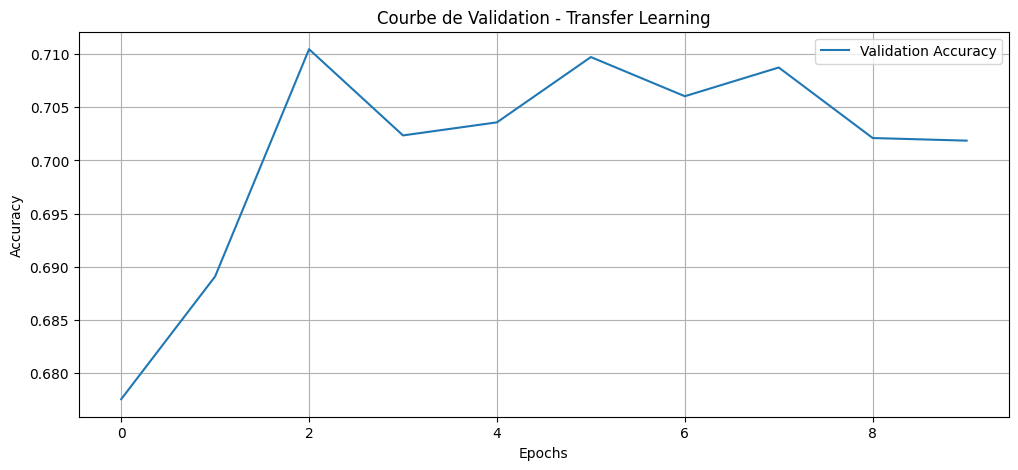

In [7]:
# Connexion TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

# Variables
NUM_CLASSES = 120

# Création et entraînement du modèle dans le scope TPU
with strategy.scope():
    base_model.trainable = False
    transfer_model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    transfer_model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history_transfer = transfer_model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10
    )

# Sauvegarde du modèle dans Google Drive
transfer_model.save('/content/drive/MyDrive/mobilenet_model.h5')

# Affichage des résultats
acc_transfer = history_transfer.history['val_accuracy'][-1]

print(f"\n✅ Précision finale MobileNetV2 Transfer Learning : {acc_transfer:.2%}")

# Courbes d'apprentissage
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de Validation - Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
